# find specific molecule in dataset

In [28]:
import rdkit.Chem

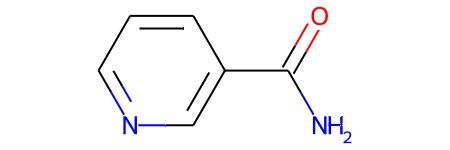

In [131]:
mol = rdkit.Chem.MolFromSmiles('NC(=O)C1=CN=CC=C1')
# mol = rdkit.Chem.MolFromSmiles('C1CCCCN1C(=O)C1=CC=C(N(=O)=O)C=C1')
mol

In [133]:
mc = rdkit.Chem.MolToSmiles(mol)

In [134]:
mc

'NC(=O)c1cccnc1'

In [135]:
smiles = []
names = []
with open('/home/sahre/git_repositories/conformer-scoring/molecules.smi', 'r') as f:
    for line in f:
        smiles.append(line.split()[0])
        names.append(line.split()[1])

In [136]:
canonical_smiles = []
for s in smiles:
    mol_tmp = rdkit.Chem.MolFromSmiles(s)
    canonical_smiles.append(rdkit.Chem.MolToSmiles(mol_tmp))

In [137]:
for c, n in zip(canonical_smiles, names):
    if c == mc:
        print(n)

omegapdb_1yc5


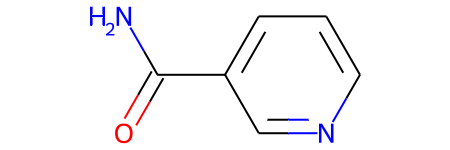

In [138]:
rdkit.Chem.MolFromSmiles('n1cc(ccc1)C(=O)N')

# look at conformer structures

In [152]:
import ase.visualize
from ase import Atoms
from ase.io import write

import pandas as pd

from matplotlib import pyplot as plt

In [141]:
def read_conformer(file):
    with open(file, 'r') as f:
        for i in range(4):
            line = f.readline()
        natoms = int(line.split()[0])
        elements = []
        coords = []
        for i in range(natoms):
            line = f.readline().split()
            coords.append([float(c) for c in line[:3]])
            elements.append(line[3])
    return(elements, coords)
    

In [142]:
name = 'omegapdb_1yc5' # dihe 1 2 6 8
# name = 'omegacsd_PNBPIP' # 5 0 9 10

In [143]:
energy_csv = f'/home/sahre/git_repositories/conformer-scoring/data-merge.csv'
energies = pd.read_csv(energy_csv)
energies_mol = energies.loc[energies['name'] == f'Neutral_jobs/{name}', ['mmff@mmff', 'pm7@pm7', 'dft@dft']]

In [144]:
energies_mol['mmff@mmff']

6551    6.331210
6552    7.334992
6553    7.349939
6554    7.303329
6555    6.337004
6556    6.380613
Name: mmff@mmff, dtype: float64

In [115]:
dihe = {'mmff':[], 'pm7':[], 'opt':[]}
for i in range(1, 7):
    for k in dihe.keys():
        el, coords = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/{name}/rmsd{i}-{k}.mol')
#         el, coords_opt = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/omegapdb_1yc5/rmsd{i}-{k}.mol')
#         el, coords_pm7 = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/omegapdb_1yc5/rmsd{i}-{k}.mol')
    
        conf = Atoms(''.join(el), positions=coords)
        dihe[k].append(conf.get_dihedral(5,0,9, 10))
#     for k in dihe:
#         conf.get_dihedral(1,2,6,8)
#     ase.visualize.view(conf)

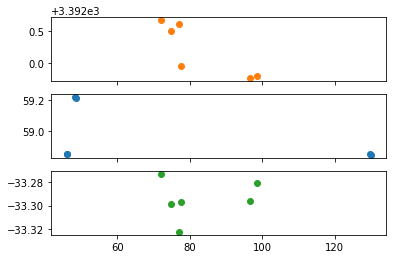

In [116]:
fig, ax = plt.subplots(3,1, sharex=True)
ax[1].plot(dihe['mmff'], energies_mol['mmff@mmff'], 'o', color='tab:blue')
ax[0].plot(dihe['opt'], energies_mol['dft@dft'], 'o', color='tab:orange')
ax[2].plot(dihe['pm7'], energies_mol['pm7@pm7'], 'o', color='tab:green')

In [146]:
method = 'opt'
for i in range(1, 7):
    el, coords = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/{name}/rmsd{i}-{method}.mol')
#         el, coords_opt = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/omegapdb_1yc5/rmsd{i}-{k}.mol')
#         el, coords_pm7 = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/omegapdb_1yc5/rmsd{i}-{k}.mol')
    
    conf = Atoms(''.join(el), positions=coords)
#         dihe[k].append(conf.get_dihedral(1,2,6,8))
#     for k in dihe:
#         conf.get_dihedral(1,2,6,8)
    ase.visualize.view(conf)

In [151]:
el, coords = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/{name}/rmsd{3}-{method}.mol')
conf = Atoms(''.join(el), positions=coords)
# conf.get_dihedral(5,0,9,10)
conf.get_dihedral(1,2,6,8)
ase.visualize.view(conf)

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

In [153]:
# write('/data/sahre/projects/atomic-energies/data/nicotinamide/base_structure.xyz', conf)

In [121]:
el, coords1 = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/{name}/rmsd{1}-{method}.mol')
conf1 = Atoms(''.join(el), positions=coords1)
el, coords2 = read_conformer(f'/home/sahre/git_repositories/conformer-scoring/Neutral_jobs/{name}/rmsd{2}-{method}.mol')
conf2 = Atoms(''.join(el), positions=coords2)


46.04842627053967

In [123]:
conf1.get_positions() - conf2.get_positions()

array([[ 0.0117, -0.0025,  0.0013],
       [ 0.0467,  0.0162,  0.0146],
       [ 0.067 ,  0.0321,  0.0071],
       [ 0.052 ,  0.0292, -0.0132],
       [ 0.017 ,  0.0102, -0.0259],
       [-0.003 , -0.0056, -0.0183],
       [ 0.0731,  0.046 , -0.0211],
       [ 0.0545,  0.0422, -0.0393],
       [ 0.1081,  0.0631, -0.0095],
       [-0.0108, -0.0199,  0.0101],
       [-0.0368, -0.0413,  0.0241],
       [-0.0005, -0.0111,  0.0029],
       [-0.02  , -0.0262,  0.0134],
       [ 0.0043, -0.0156,  0.0184],
       [ 0.022 ,  0.0089, -0.0161],
       [ 0.0417,  0.0231, -0.0251],
       [ 0.0167,  0.012 , -0.0294],
       [ 0.0581,  0.0181,  0.0309],
       [ 0.094 ,  0.0465,  0.0176],
       [ 0.0051,  0.0076, -0.0412],
       [-0.0303, -0.0206, -0.0275],
       [-0.0298, -0.0431,  0.0398],
       [-0.0439, -0.0292, -0.0092],
       [-0.0118, -0.0263,  0.0235],
       [ 0.026 , -0.0153,  0.0435],
       [ 0.0007,  0.009 , -0.0404],
       [ 0.0413,  0.0165, -0.0111],
       [ 0.0524,  0.04  , -0

In [ ]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.03)  # adjust space between axes

plt.rcParams['font.size'] = 20

ax2.plot(rcoord_UFF,np.array(atomic_energies)[:,0], '--o',label='0')
ax.plot(rcoord_UFF,np.array(atomic_energies)[:,1], '--o',label='1')
ax2.plot(rcoord_UFF,np.array(atomic_energies)[:,3], '-o', color = 'tab:red', label='3')
    
# plt.xlabel('r(CO) (Ang)')
# plt.ylabel('E (Ha)')
# plt.legend()
# plt.legend(bbox_to_anchor=(1.0, 1.05))

ax.plot(rcoord_UFF,np.array(atomic_energies)[:,2], '-o', color = 'tab:green', label='2')
ax.plot(rcoord_UFF,np.array(atomic_energies)[:,4], '--o', color = 'tab:purple',label='4')
ax.set_ylim([0.0025, 0.15])
ax2.set_ylim([0.000, 0.0025])

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.legend(bbox_to_anchor=(1.35, 1.0))
ax2.legend(bbox_to_anchor=(1.05, 1.0))

ax.set_ylabel(r'$E_{\rm{tot}}$ (Ha)', loc='bottom')
ax2.set_xlabel(r'r(CO) $(\AA)$')